In [6]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

%matplotlib inline

Solve the equation
$$\frac{d^2y}{dx} + 3y = 0$$
With $y(0) = 7$ and $y(2\pi) = 0$.

In [7]:
#  This is the exact solution to the above problem.
def return_exact(x):
    y = 7 * np.cos(np.sqrt(3) * x) - 7 * np.cos(2 * np.pi * np.sqrt(3) ) / np.sin(2 * np.pi * np.sqrt(3) )* np.sin(np.sqrt(3)*x)
    
    return y

Finite difference approximation for the second derivative
$$\frac{d^2y}{dx^2} \approx \frac{y_{i-1} -2y_i + y_{i+1}}{\Delta^2}$$

So our equation cn be transformed to a system of algebraic equations:
$$\frac{y_{i-1} -2y_i + y_{i+1}}{\Delta^2} + 3y_i = 0$$

For example,
$$
\begin{align*}
y_1 & = & 7 \\
\frac{y_1 -2y_2 + y_3}{\Delta^2} + 3y_2  &= & 0 \\
\frac{y_2 -2y_3 + y_4}{\Delta^2} + 3y_3  &= & 0 \\
\frac{y_3 -2y_4 + y_5}{\Delta^2} + 3y_4  &= & 0 \\
\frac{y_4 -2y_5 + y_6}{\Delta^2} + 3y_5  &= & 0 \\
y_6 & = & 0 
\end{align*}
$$

Or in matrix form:
$$
\left[
\frac{1}{\Delta^2}
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 1 & -2 & 1 & 0  \\
0 & 0 & 0 & 1 & -2 & 1  \\
0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix} + 
3
\begin{pmatrix}
1/3 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1/3
\end{pmatrix} \quad \right]
\begin{pmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
y_6
\end{pmatrix}= 
\begin{pmatrix}
7 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{pmatrix}
$$

In [8]:
#  Define our grid
N = 50
x = np.linspace(0, 2 * np.pi, N)

# Calculate the grid spacing.  Since we are using a uniform sequence, all the values are the same so we only need one entry of the resulting diff array.
Delta = np.diff(x)
Delta = Delta[0]

#  Define the diagonal elements for the second derivative matrix
D = -2 * np.ones(N)
Dm1 = np.ones(N-1)
D1 = np.ones(N-1)

#  Create the matrix
M1 = diags([Dm1, D, D1], [-1, 0, 1], shape = (N, N), format = 'csc')

#  Divide through by 1/Delta**2 prefactor
M1 = M1 / Delta**2

#  Reset the elements corrisponding to the boundary values
M1[0, 0] = 1
M1[0, 1] = 0
M1[-1, -1] = 1
M1[-1, -2] = 0

#  Create out 3y diagonal matrix and set the boundary value elements
M2 = diags( 3 * np.ones(N), 0, shape = (N,N), format = 'csc')
M2[0,0] = 0
M2[-1, -1] = 0

M = M1 + M2

#  This is the vector of known values from the RHS of our matrix above.
b = np.zeros(N)
b[0] = 7

#  Solve the system
y = spsolve(M, b)

###  Plot the exact soluition and the numerical estimate

Text(0, 0.5, 'y')

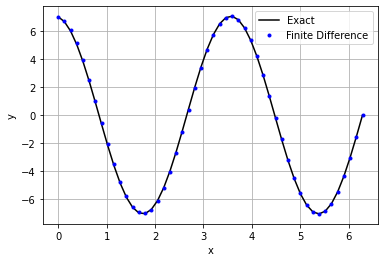

In [11]:
plt.plot(x, return_exact(x), 'k', label='Exact')
plt.plot(x, y, 'b.', label='Finite Difference')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### Calculate and plot the error

Text(0, 0.5, 'Error')

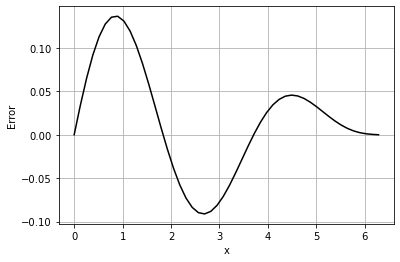

In [12]:
E = y - return_exact(x)
plt.plot(x, E, 'k')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Error')